## Fluxos de Caixa

<p>O valor presente de uma série de fluxos de caixa (ou seja, pagamentos de cupons/juros ao longo do tempo de vida daquele título) é representado pela seguinte equação:</p>

$$PV(t) = V(t_{j}, F_{j}, I_{j}, i_{j}, \alpha_{j}) = \sum_{j=1}^{n}\frac{F_{j}I_{j}\alpha_{j}}{(1+i_{j})^{t_{j}-t}}$$

<p>Onde:</p>
- $t_{j}-t$ = prazo do fluxo de caixa; $f_{j}$ = fluxo de caixa num dado prazo;<br>
- $I_{j}(t)$ = fator indexador acumulado do fluxo de caixa = $\prod_{l=1}^{t}[1+\Delta I(l)]$;<br>
- $\alpha_{j}(t)$ = fator de crédito em cada prazo do fluxo de caixa ($[0,1]$);<br>
- $i_{j}(t)$ = taxa de juro para o prazo do fluxo de caixa;<br>
- $\omega_{j}(t) = \frac{f_{j}I_{j}(t)\alpha_{j}(t)}{PV(t)\big(1+i_{j}(t)\big)^{t_{j}-t}}$ = proporção do $PV(t)$ no vértice $j$.

## Variação do Fluxo de Caixa

<p>Sabemos que toda <b>variação</b> é obtida por meio de derivadas parciais com relação às variáveis independentes do modelo. Sabemos também que uma ferramenta muito útil quando estamos lidando com funções suaves (existem infinitas derivadas) é a <b>Série de <i>Taylor</i></b>, pois ela nos permite aproximar a derivada pela soma de derivadas de graus até $N$ - onde $N$ geralmente é 1, 2 ou 3.</p>
<br>
<p>Com isto em mente, vamos aproximar a derivada do $PV(t)$ definido acima, através de uma <b>Série de <i>Taylor</i></b> até a derivada segunda.</p>

$$\frac{\Delta PV(t)}{PV(t)} \approx \sum_{j=1}^{n}\omega_{j}(t)\bigg[\frac{\Delta I_{j}(t)}{I_{j}(t)} + \frac{\Delta \alpha_{j}(t)}{\alpha_{j}(t)} - \frac{(t_{j}-t)}{1+i_{j}(t)}\Delta i_{j}(t) + \ln{[1+i_{j}(t)]}\Delta t + \frac{1}{2}\frac{(t_{j}-t+1)(t_{j}-t)}{\big(1+i_{j}(t)\big)^{2}}\big(\Delta i_{j}(t)\big)^{2}\bigg]$$

<p>Nesta equação, os termos representam:</p>

- O termo $F_{j}$ da equação $[1]$, representando os fluxos de caixa, não varia. Logo, sua variação desaparece;<br>
- O termo $\frac{\Delta I_{j}(t)}{I_{j}(t)}$ remete à variação do indexador ao qual o título está ligado;<br>
- O termo $\frac{\Delta \alpha_{j}(t)}{\alpha_{j}(t)}$ remete à variação do <i>rating</i> de crédito daquele título;<br>
- O termo $\frac{(t_{j}-t)}{1+i_{j}(t)}\Delta i_{j}(t)$ é a derivada em relação à taxa de juros;<br>
- O termo $\ln{[1+i_{j}(t)]}\Delta t$ é a derivada em relação ao tempo desta taxa de juros;<br>
- O termo $\frac{1}{2}\frac{(t_{j}-t+1)(t_{j}-t)}{\big(1+i_{j}(t)\big)^{2}}\big(\Delta i_{j}(t)\big)^{2}$ é a única derivada segunda presente na fórmula, que é a derivada da taxa de juros, dado que esta variável possui uma relevância em sua derivada segunda quando temos choques heterogêneos na mesma.<br>

<p>Da equação $[1]$ acima, podemos dizer que o termo $\ln{[1+i_{j}(t)]}\Delta t$ é o famoso "<b>carrego</b>" - que em suma representa a passagem do tempo sobre aquela curva de juros, e será sempre positivo quando os juros são nominais. O termo $\frac{(t_{j}-t)}{1+i_{j}(t)}$ é o chamado <b><i>Modified Duration</i></b>, porque representa a duração ponderada pela taxa daquele título. E o termo $\frac{(t_{j}-t+1)(t_{j}-t)}{\big(1+i_{j}(t)\big)^{2}}$ é a chamada <b>Convexidade</b>.</p>
<br>
<p>Agora vamos pensar da seguinte forma:</p>

- Se estivermos falando de um <b>título pré fixado</b> o termo $\frac{\Delta I_{j}(t)}{I_{j}(t)}$ desaparece;<br>
- Se estivermos falando de um <b>título do tesouro</b> o termo $\frac{\Delta \alpha_{j}(t)}{\alpha_{j}(t)}$ desaparece;<br>
- O termo $\ln{[1+i_{j}(t)]}\Delta t$ muitas vezes é ignorado (errôneamente).<br>

## Exemplo Prático

<p>Seja um título com as seguintes características:</p>

- <b>Vencimento:</b> 3 anos;
- <b>Cupom:</b> Semestral;
- <b>Taxa:</b> $10\%$ a.a.

<p>Dada a curva de mercado abaixo, vamos calcular os seguintes parâmetros:</p>

- O <b>Valor Presente</b> (PU) do papel;
- A <b>Composição</b> (por vértice) da <i>Modified Duration</i>;
- A <b>Composição</b> da Convexidade.

|Vértices|ETTJ|<i>Spread</i> de Crédito|
|--- |--- |--- |
|126|3.00%|0.25%|
|252|5.00%|1.00%|
|378|6.00%|1.25%|
|504|7.00%|1.35%|
|630|8.00%|1.40%|
|756|8.25%|1.45%|
|882|8.50%|1.47%|
|1008|8.75%|1.49%|

In [ ]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# definindo o titulo
dias_ano = 252      # dias úteis
vcto = 3            # vencimento em 3 anos
cupom = 0.5         # cupom semestral
taxa_titulo = 10    # taxa do título de 10%
principal = 1000000 # principal de 1 milhão

# calculando o valor do cupom
valor_cupom = np.round(principal * (taxa_titulo / 100) * cupom, 5)
print(f'Valor do cupom: {valor_cupom}')

prazo = np.linspace(start=dias_ano*cupom, stop=dias_ano*vcto, num=int(vcto/cupom), endpoint=True)

Valor do cupom: 48808.84817


In [ ]:
# Criando a ETTJ base
# vertices = [252, 378, 504, 630, 756, 882, 1008, 1134, 1260,
#             1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268]

vertices = [126, 252, 378, 504, 630, 756, 882, 1008]

# taxa = [8.0381, 8.6546, 9.0584, 9.3531, 9.5865, 9.7795, 9.9425, 10.0825,
#         10.2049, 10.3133, 10.4102, 10.4972, 10.5754, 10.6460, 10.7100, 10.7683, 10.8215]

taxa = [3.0, 5.0, 6.0, 7.0, 8.0, 8.25, 8.5, 8.75]

sprd_credito = [0.25, 1.0, 1.25, 1.35, 1.40, 1.45, 1.47, 1.49]

ettj = pd.DataFrame(np.array([taxa, sprd_credito]).T, index=vertices, columns=['Taxa (%)', 'Spread de Crédito (%)'])
ettj

,Taxa (%),Spread de Crédito (%)
126,3.00,0.25
252,5.00,1.00
378,6.00,1.25
504,7.00,1.35
630,8.00,1.40
756,8.25,1.45
882,8.50,1.47
1008,8.75,1.49


In [9]:
j = np.linspace(start=1, stop=len(prazo), num=len(prazo), endpoint=True)

# Interpolando as taxas da ETTJ para os vértices do meu título
juro_interp = make_interp_spline(vertices, taxa, k=3)(prazo)
juro = np.round(juro_interp / 100, 5) # Passando de taxa percentual para taxa decimal

# Interpolando os spreads de crédito da ETTJ para os vértices do meu título
spread_interp = make_interp_spline(vertices, sprd_credito, k=3)(prazo)
spread = np.round(spread_interp / 100, 5) # Passando de taxa percentual para taxa decimal

# O vetor t contém o vértice atual (que é o vértice zero neste exemplo)
t = np.zeros(len(prazo))

# Calculando o fator Valor Presente --> 1/(1+juro)^(tj - t)
fator_VP = []
for i in range(len(prazo)):
    fator_VP.append(1/(1+juro[i])**((prazo[i] - t[i])/dias_ano))
fator_VP = np.round(np.array(fator_VP), 5)

# Calculando o fator Spread de Crédito --> 1/(1+spread)^(tj - t)
fator_spread = []
for i in range(len(prazo)):
    fator_spread.append(1/(1+spread[i])**((prazo[i] - t[i])/dias_ano))
fator_spread = np.round(np.array(fator_spread), 5)

# Calculando os fluxos por prazo
fluxo = []
for i in range(len(prazo)):
    if prazo[i] == vcto*dias_ano:
        fluxo.append(principal+valor_cupom)
    else:
        fluxo.append(valor_cupom)
fluxo = np.array(fluxo).T
        
# Trazendo os fluxos a valor presente pela ettj --> fluxo * fator_VP * fator_spread
VPj = np.round(np.multiply(np.multiply(fluxo, fator_spread), fator_VP), 5)

# Valor Presente total do título
PV_t = np.round(np.sum(VPj), 5)

# Calculando o peso de cada fluxo dividindo o PV do fluxo pelo PV do bond
wj = np.round(VPj/PV_t, 5)

# Calculando o Modified Duration para cada vértice --> Tal como dado pela equação apresentada anteriormente
MDj = []
for i in range(len(prazo)):
    MDj.append(np.round((prazo[i] - t[i])/(1 + juro[i])*wj[i], 5))
MDj = np.array(MDj)
    
# Modified Duration total do bond - ou seja, qual o vencimento dele ponderado pelos fluxos intermediários
MD_t = np.round(np.sum(MDj), 5)
MD_ano = MD_t/dias_ano
print(f'Duração real do título: {np.round(MD_ano, 2)}')

Duração real do título: 2.47


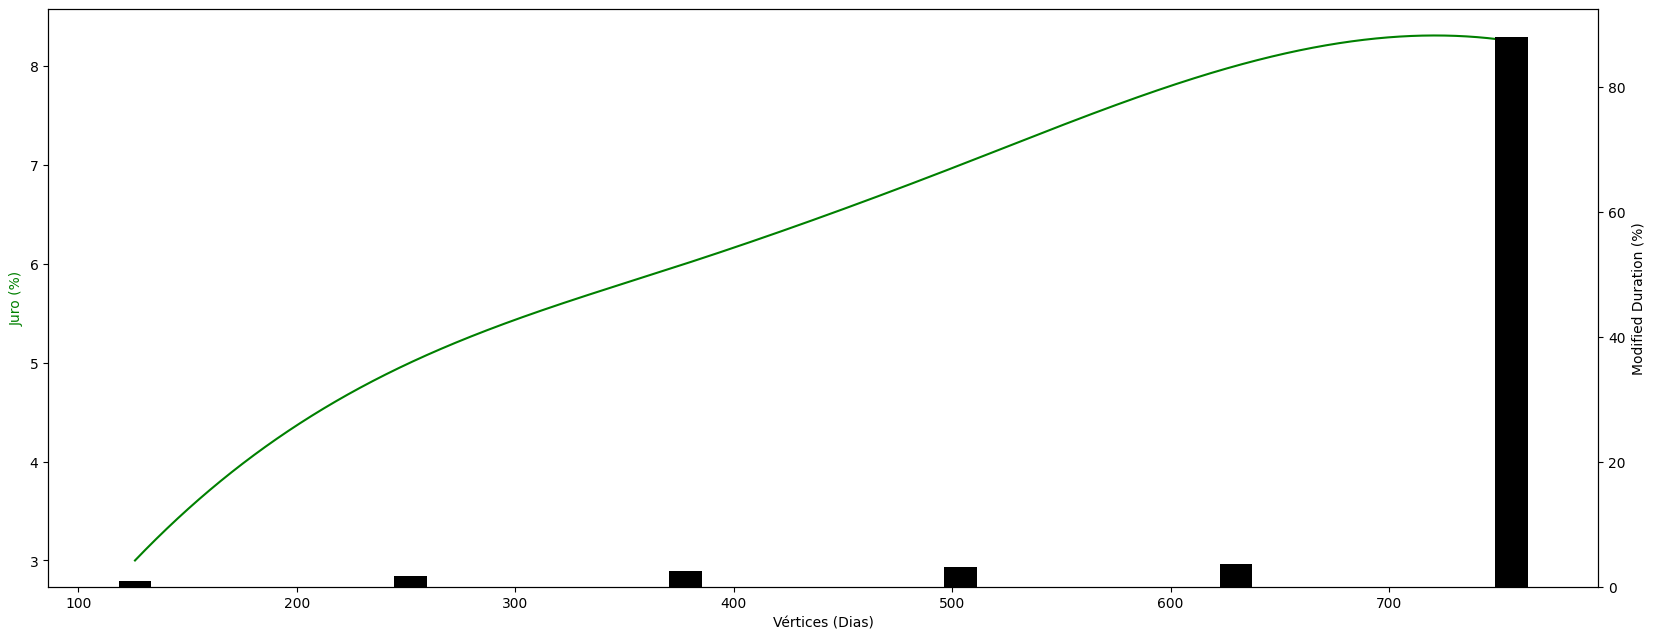

In [10]:
# fig, ax1 = plt.subplots(figsize=(20,7.5))

# ax2 = ax1.twinx()
# ax1.plot(prazo, juro, 'g-')
# ax2.plot(prazo, MDj, 'b-')

# ax1.set_xlabel('Vértices (Dias)')
# ax1.set_ylabel('Juro', color='g')
# ax2.set_ylabel('Modified Duration', color='b')

# plt.show()

juro_spline = make_interp_spline(prazo, juro)
mdj_spline = make_interp_spline(prazo, MDj)

new_prazo = np.linspace(prazo.min(), prazo.max(), 5000)
new_juro = juro_spline(new_prazo)
new_mdj = mdj_spline(new_prazo)

fig, ax1 = plt.subplots(figsize=(20,7.5))

ax2 = ax1.twinx()
ax1.plot(new_prazo, new_juro*100, 'g-')
# ax2.plot(new_prazo, new_mdj, 'b-')
ax2.bar(prazo, (MDj/MD_t)*100, 15, color='k')

ax1.set_xlabel('Vértices (Dias)')
ax1.set_ylabel('Juro (%)', color='g')
ax2.set_ylabel('Modified Duration (%)', color='black')

plt.show()